# <font color=black> Analysis - ICA vs iCAP in the spinal cord </font>
<hr style="border:1px solid black">

**The goal of this analysis is to investigate the reproducibility of spinal networks extracted using different methods and datasets.**

**METHODS CONSIDERED:**
- Independent Component Analysis – called `ica` in this script
- Innovation-driven CoActivation Pattern analysis – called `icap` in this script

**DATASETS:**
- A dataset covering C1 to C8 spinal levels, with a resolution of 1.6x1.6x4mm<sup>3</sup>  and a TR of 1.55s – called `mtl` in this script
- A dataset covering C5 to C8 spinal levels, with a resolution of 1x1x3mm<sup>3</sup> and a TR of 2.5s – called `gva` in this script

**ANALYSES:**
- _**Qualitative:**_ matching & visualization of one or two set(s) of components
- _**Quantitative:**_
    * Analysis of spatial similarity (for a single K, or across multiple Ks)
    * Distribution across axial subdvisions (D,V,L,R) for different Ks

In [222]:
import sys,json

sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')

from plotting import Plotting
from spine_only_analysis import SpineOnlyAnalysis

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Initialization

### Load configuration file 

In [223]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_NK.json') as config_file:
    config = json.load(config_file)

## Qualitative evaluation

### Create instance of class

In [226]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis
params_qual_1 = {'k':15, 'dataset':'gva', 'analysis':'ica'}
params_qual_2 = {'k':15, 'dataset':'gva', 'analysis':'icap'}

plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=params_qual_2)

### Visualizing components
_Note: the component numbers refer to the ones of the original datasets (i.e., before any type of reordering)_

COMPUTING SIMILARITY WITH METHOD: Dice
...Compute similarity between pairs of components
...Ordering components based on maximum weight matching
DONE!


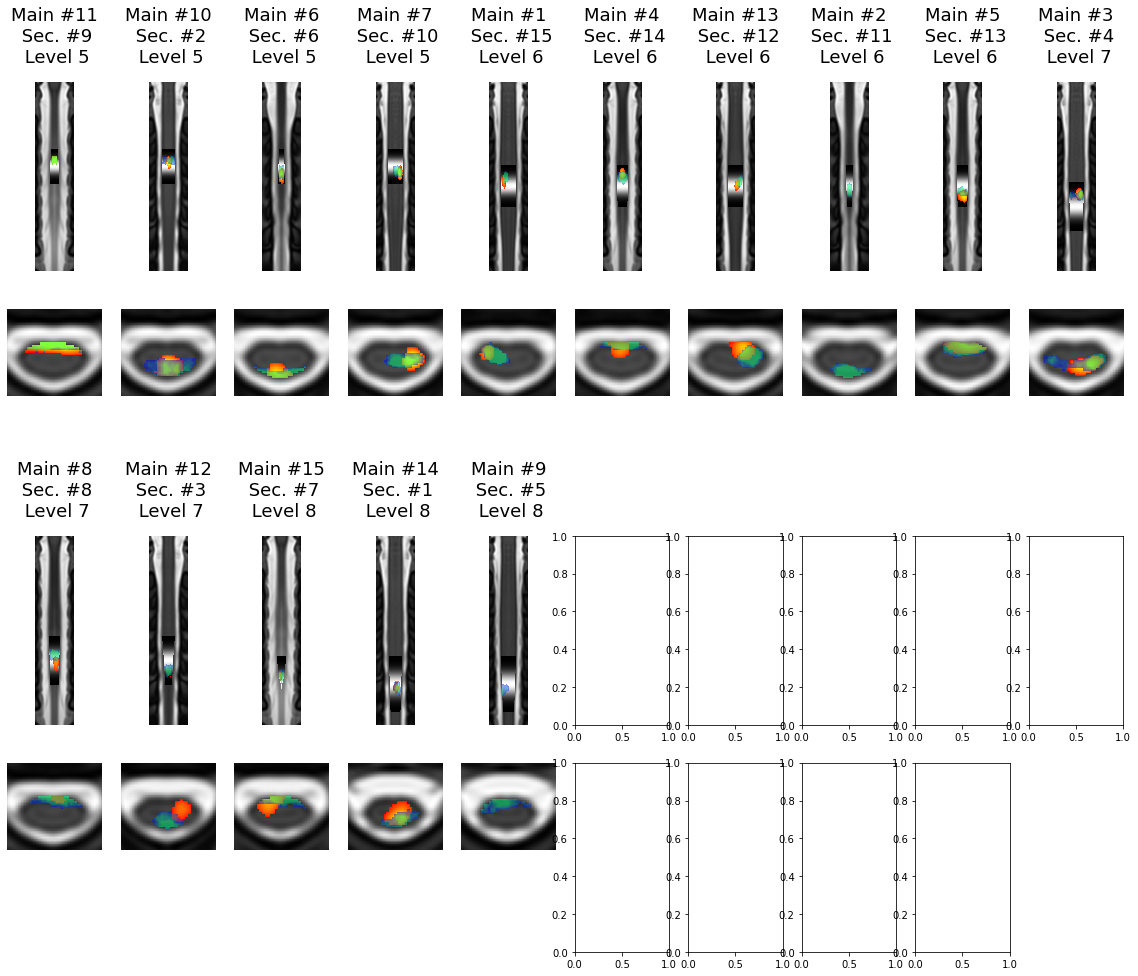

In [227]:
plotting.sc_plot(show_spinal_levels=True, k_per_line=10, lthresh=2.5, uthresh=5, save_results=False)

## Quantitative analyses

### Create instance of class
Note: the idea is to load all the possible K only once when instantiating the class

In [303]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_1 = {'k_range':range(4,41), 'dataset':'gva', 'analysis':'ica'}
params_quant_2 = {'k_range':range(4,41), 'dataset':'gva', 'analysis':'icap'}

spine_analysis = SpineOnlyAnalysis(config,params1=params_quant_1,params2=params_quant_2)

### Analyze spatial similarity
**Spatial similarity can be explored in two different ways:**
1. To obtain a similarity matrix for a particular K per condition
> In that case, pass `k1` (and `k2`if different) as arguments <br>
2. To look at the evolution of the mean similarity across different Ks
> In that case, pass `k_range` as argument

### <font color=red> WARNING: FOR NOW, ZTHRESHOLD ARE HARDCODED -> TO BE CHANGED </font>



METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 40 vs gva_icap at K = 40 

The mean similarity is 0.54


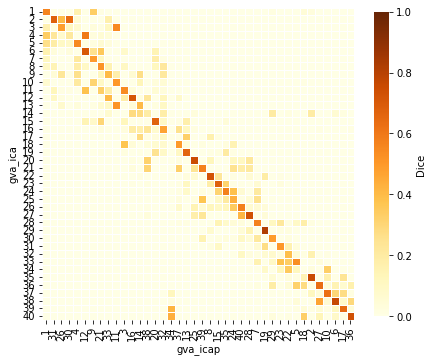

In [367]:
spine_analysis.spatial_similarity(k1=40,similarity_method='Dice')

METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 40 vs gva_icap at K = 40 

The mean similarity is 0.41


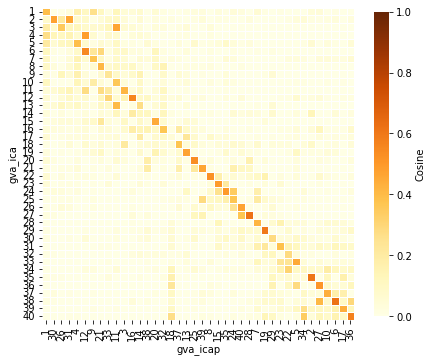

In [366]:
spine_analysis.spatial_similarity(k1=40,similarity_method='Cosine')

### Investigate axial distribution for different Ks

COMPUTING AXIAL DISTRIBUTION 
 ––– Set: gva_ica 
 ––– Range: range(4, 41) 
 ––– Threshold: 2 
 ––– % for matching: 70
...Loading data for the different spinal masks
...Computing distribution for each K
......K = 4
......K = 5
......K = 6
......K = 7
......K = 8
......K = 9
......K = 10
......K = 11
......K = 12
......K = 13
......K = 14
......K = 15
......K = 16
......K = 17
......K = 18
......K = 19
......K = 20
......K = 21
......K = 22
......K = 23
......K = 24
......K = 25
......K = 26
......K = 27
......K = 28
......K = 29
......K = 30
......K = 31
......K = 32
......K = 33
......K = 34
......K = 35
......K = 36
......K = 37
......K = 38
......K = 39
......K = 40
DONE!


{4: {'Q': 0, 'LR': 1, 'DV': 2, 'F': 1},
 5: {'Q': 0, 'LR': 1, 'DV': 1, 'F': 3},
 6: {'Q': 0, 'LR': 0, 'DV': 3, 'F': 3},
 7: {'Q': 0, 'LR': 0, 'DV': 4, 'F': 3},
 8: {'Q': 0, 'LR': 2, 'DV': 4, 'F': 2},
 9: {'Q': 0, 'LR': 2, 'DV': 5, 'F': 2},
 10: {'Q': 0, 'LR': 3, 'DV': 6, 'F': 1},
 11: {'Q': 0, 'LR': 2, 'DV': 5, 'F': 4},
 12: {'Q': 0, 'LR': 4, 'DV': 6, 'F': 2},
 13: {'Q': 0, 'LR': 4, 'DV': 9, 'F': 0},
 14: {'Q': 0, 'LR': 5, 'DV': 9, 'F': 0},
 15: {'Q': 0, 'LR': 4, 'DV': 8, 'F': 3},
 16: {'Q': 0, 'LR': 6, 'DV': 9, 'F': 1},
 17: {'Q': 0, 'LR': 5, 'DV': 8, 'F': 4},
 18: {'Q': 1, 'LR': 6, 'DV': 10, 'F': 1},
 19: {'Q': 2, 'LR': 7, 'DV': 5, 'F': 5},
 20: {'Q': 4, 'LR': 6, 'DV': 5, 'F': 5},
 21: {'Q': 3, 'LR': 7, 'DV': 5, 'F': 6},
 22: {'Q': 2, 'LR': 9, 'DV': 9, 'F': 2},
 23: {'Q': 3, 'LR': 9, 'DV': 8, 'F': 3},
 24: {'Q': 3, 'LR': 11, 'DV': 7, 'F': 3},
 25: {'Q': 5, 'LR': 8, 'DV': 8, 'F': 4},
 26: {'Q': 4, 'LR': 11, 'DV': 7, 'F': 4},
 27: {'Q': 6, 'LR': 10, 'DV': 9, 'F': 2},
 28: {'Q': 3, 'LR'

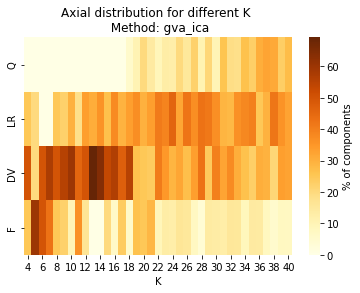

In [332]:
spine_analysis.k_axial_distribution(spine_analysis.name1)

COMPUTING AXIAL DISTRIBUTION 
 ––– Set: gva_icap 
 ––– Range: range(4, 41) 
 ––– Threshold: 2 
 ––– % for matching: 70
...Loading data for the different spinal masks
...Computing distribution for each K
......K = 4
......K = 5
......K = 6
......K = 7
......K = 8
......K = 9
......K = 10
......K = 11
......K = 12
......K = 13
......K = 14
......K = 15
......K = 16
......K = 17
......K = 18
......K = 19
......K = 20
......K = 21
......K = 22
......K = 23
......K = 24
......K = 25
......K = 26
......K = 27
......K = 28
......K = 29
......K = 30
......K = 31
......K = 32
......K = 33
......K = 34
......K = 35
......K = 36
......K = 37
......K = 38
......K = 39
......K = 40
DONE!


{4: {'Q': 0, 'LR': 0, 'DV': 1, 'F': 3},
 5: {'Q': 0, 'LR': 0, 'DV': 3, 'F': 2},
 6: {'Q': 0, 'LR': 0, 'DV': 5, 'F': 1},
 7: {'Q': 0, 'LR': 0, 'DV': 7, 'F': 0},
 8: {'Q': 0, 'LR': 0, 'DV': 7, 'F': 1},
 9: {'Q': 0, 'LR': 0, 'DV': 7, 'F': 2},
 10: {'Q': 0, 'LR': 0, 'DV': 7, 'F': 3},
 11: {'Q': 0, 'LR': 0, 'DV': 7, 'F': 4},
 12: {'Q': 0, 'LR': 0, 'DV': 9, 'F': 3},
 13: {'Q': 0, 'LR': 3, 'DV': 7, 'F': 3},
 14: {'Q': 0, 'LR': 3, 'DV': 10, 'F': 1},
 15: {'Q': 0, 'LR': 2, 'DV': 11, 'F': 2},
 16: {'Q': 0, 'LR': 2, 'DV': 12, 'F': 2},
 17: {'Q': 0, 'LR': 4, 'DV': 12, 'F': 1},
 18: {'Q': 0, 'LR': 3, 'DV': 11, 'F': 4},
 19: {'Q': 0, 'LR': 3, 'DV': 14, 'F': 2},
 20: {'Q': 1, 'LR': 2, 'DV': 13, 'F': 4},
 21: {'Q': 1, 'LR': 5, 'DV': 14, 'F': 1},
 22: {'Q': 0, 'LR': 7, 'DV': 14, 'F': 1},
 23: {'Q': 0, 'LR': 8, 'DV': 12, 'F': 3},
 24: {'Q': 2, 'LR': 6, 'DV': 13, 'F': 3},
 25: {'Q': 3, 'LR': 7, 'DV': 12, 'F': 3},
 26: {'Q': 2, 'LR': 6, 'DV': 14, 'F': 4},
 27: {'Q': 1, 'LR': 8, 'DV': 16, 'F': 2},
 28: {'Q

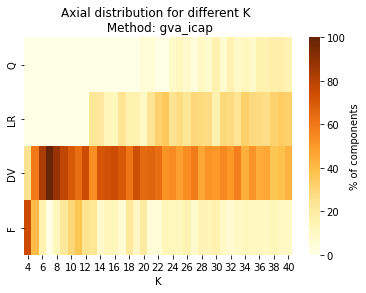

In [333]:
spine_analysis.k_axial_distribution(spine_analysis.name2)